In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(220, 220)

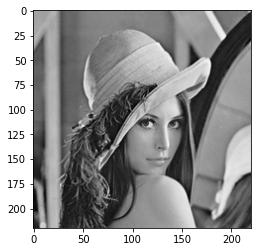

In [50]:
image = cv2.imread('lema.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap= 'gray')
plt.show
image.shape

Before padding 

In [51]:
image_array = np.array(image)
print(image_array)
print("*********Original shape*******")
print(image_array.shape)

[[168 168 167 ... 171 177 154]
 [168 167 167 ... 174 182 158]
 [169 166 167 ... 150 132  99]
 ...
 [ 59  61  64 ...  82  98 102]
 [ 56  61  61 ...  95 110 111]
 [ 53  61  59 ... 106 116 118]]
*********Original shape*******
(220, 220)


After Padding

In [52]:
arr = np.zeros((1,222))
arr1 = np.zeros((220,1))
arr11 = np.hstack((arr1,image_array))
arr22 = np.hstack((arr11,arr1))
arr33 = np.vstack((arr22,arr))
final = np.vstack((arr,arr33))
print(final)
print(final.shape)



[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 168. 168. ... 177. 154.   0.]
 [  0. 168. 167. ... 182. 158.   0.]
 ...
 [  0.  56.  61. ... 110. 111.   0.]
 [  0.  53.  61. ... 116. 118.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
(222, 222)


In [53]:
l1_filter = np.zeros((5,3,3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],   
                                [-1, 0, 1],   
                                [-1, 0, 1]]])

l1_filter[1, :, :] = np.array([[[1,   1,  1],   
                                [0,   0,  0],   
                                [-1, -1, -1]]])
l1_filter[2, :, :] = np.array([[[1,   -1,  0],   
                                [1,   -1,  0],   
                                [1, -1,  0]]])
l1_filter[3, :, :] = np.array([[[0,   1,  -1],   
                                [0,   1,  -1],   
                                [0,  1,  -1]]])
l1_filter[4, :, :] = np.array([[[1,   1,  1],   
                                [-1,   -1,  -1],   
                                 [0,   0,  0]]])


In [54]:
###For single channel Filter
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in np.uint16(np.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

Filter  1
Filter  2
Filter  3
Filter  4
Filter  5
After Convolution
[[[ 335. -335. -336.    1. -336.]
  [  -2. -502.    1.    1. -503.]
  [   5. -504.    1.   -6. -505.]
  ...
  [  79. -496.  -65.  -14. -488.]
  [ -33. -514.  -14.   47. -502.]
  [-359. -340.   47.  312. -331.]]

 [[ 501.    1. -505.    4.    1.]
  [  -4.    1.    4.    0.    1.]
  [   6.    5.    0.   -6.    1.]
  ...
  [  71.   66.  -75.    4.   -8.]
  [ -84.  121.    4.   80.  -12.]
  [-491.  100.   80.  411.   -9.]]

 [[ 498.    6. -501.    3.    0.]
  [  -2.    8.    3.   -1.    0.]
  [   6.    7.   -1.   -5.    4.]
  ...
  [ -24.  225.   -7.   31.   74.]
  [ -93.  306.   31.   62.  133.]
  [-378.  217.   62.  316.  109.]]

 ...

 [[ 186.    6. -174.  -12.    3.]
  [  12.    6.  -12.    0.    0.]
  [  10.    5.    0.  -10.    0.]
  ...
  [  68.  -75.  -27.  -41.  -44.]
  [  63.  -81.  -41.  -22.  -47.]
  [-284.  -52.  -22.  306.  -31.]]

 [[ 183.    6. -168.  -15.    3.]
  [  16.   11.  -15.   -1.    6.]
  [   8.  

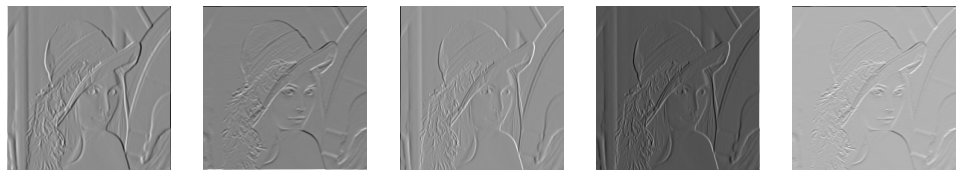

None
**********After Stacking Convolution Features Map*********
5
220
*********8After Combining*********


<function matplotlib.pyplot.show>

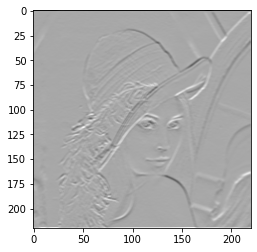

In [55]:
# Convolution Functiom implementation for multiple channel filters


def conv(img, conv_filter):

    if len(img.shape) != len(conv_filter.shape) - 1: # Check whether number of dimensions is the same
        print("Number of dimensions in conv filter and image do not match.")  
        exit()
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Filter must have an odd size.')
        sys.exit()

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) 
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps[:,:] # Returning all feature maps.




def print_image(resulted_images):
    fig=plt.figure(figsize=(17, 17))
    columns = 5
    rows = 1
    for i in range(1, columns*rows+1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(resulted_images[i-1], cmap="gray")
        plt.axis("off")
    plt.show()

l1_feature_map = conv(final,l1_filter) 
print("After Convolution");
print(l1_feature_map)
l1_feature_map.shape

l1_feature_map_stack = [l1_feature_map[:,:,0]]
l1_feature_map_stack.append(l1_feature_map[:,:,1])
l1_feature_map_stack.append(l1_feature_map[:,:,2])
l1_feature_map_stack.append(l1_feature_map[:,:,3])

l1_feature_map_stack.append(l1_feature_map[:,:,4])

print("**********After Convolution Features Map*********")
conolution_feature_map = print_image(l1_feature_map_stack)

print(conolution_feature_map)
print("**********After Stacking Convolution Features Map*********")
print(len(l1_feature_map_stack))
total = 0
for ele in range(0, len(l1_feature_map_stack)): 
    total = total + l1_feature_map_stack[ele] 
print(len(total))
print("*********8After Combining*********")
plt.imshow(total, cmap= 'gray')
plt.show





In [56]:
#defining Relu function
def relu(l1_feature_map):

     
      relu_out = np.zeros(l1_feature_map.shape)  
      for map_num in range(l1_feature_map.shape[-1]):

          for r in np.arange(0,l1_feature_map.shape[0]):

              for c in np.arange(0, l1_feature_map.shape[1]):

                         relu_out[r, c, map_num] = np.maximum(l1_feature_map[r, c, map_num], 0)
      return relu_out


l1_feature_map_relu = relu(l1_feature_map)


In [57]:
print("*************After Relu*****************")
print(l1_feature_map_relu)

*************After Relu*****************
[[[335.   0.   0.   1.   0.]
  [  0.   0.   1.   1.   0.]
  [  5.   0.   1.   0.   0.]
  ...
  [ 79.   0.   0.   0.   0.]
  [  0.   0.   0.  47.   0.]
  [  0.   0.  47. 312.   0.]]

 [[501.   1.   0.   4.   1.]
  [  0.   1.   4.   0.   1.]
  [  6.   5.   0.   0.   1.]
  ...
  [ 71.  66.   0.   4.   0.]
  [  0. 121.   4.  80.   0.]
  [  0. 100.  80. 411.   0.]]

 [[498.   6.   0.   3.   0.]
  [  0.   8.   3.   0.   0.]
  [  6.   7.   0.   0.   4.]
  ...
  [  0. 225.   0.  31.  74.]
  [  0. 306.  31.  62. 133.]
  [  0. 217.  62. 316. 109.]]

 ...

 [[186.   6.   0.   0.   3.]
  [ 12.   6.   0.   0.   0.]
  [ 10.   5.   0.   0.   0.]
  ...
  [ 68.   0.   0.   0.   0.]
  [ 63.   0.   0.   0.   0.]
  [  0.   0.   0. 306.   0.]]

 [[183.   6.   0.   0.   3.]
  [ 16.  11.   0.   0.   6.]
  [  8.  10.   0.   0.   5.]
  ...
  [ 81.   0.   0.   0.   0.]
  [ 48.   0.   0.   0.   0.]
  [  0.   0.   0. 331.   0.]]

 [[122. 117.   0.   0.   3.]
  [ 11. 178.  

**********After Relu Features Map*********


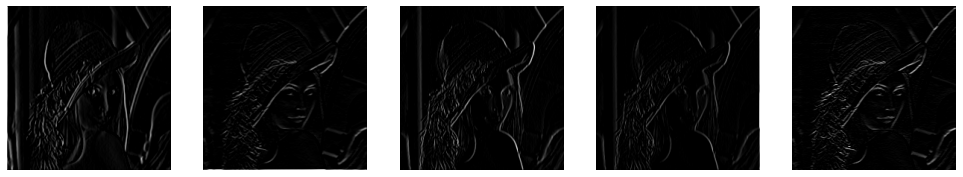

None
**********After Stacking Relu Features Map*********
5
220
*********After Combining*********


<function matplotlib.pyplot.show>

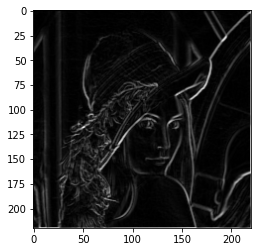

In [58]:
### After Relu  Image
l1_feature_map_relu_stack = [l1_feature_map_relu[:,:,0]]
l1_feature_map_relu_stack.append(l1_feature_map_relu[:,:,1])
l1_feature_map_relu_stack.append(l1_feature_map_relu[:,:,2])
l1_feature_map_relu_stack.append(l1_feature_map_relu[:,:,3])

l1_feature_map_relu_stack.append(l1_feature_map_relu[:,:,4])

print("**********After Relu Features Map*********")
relu_feature_map = print_image(l1_feature_map_relu_stack)

print(relu_feature_map)
print("**********After Stacking Relu Features Map*********")
print(len(l1_feature_map_relu_stack))
total1 = 0
for ele in range(0, len(l1_feature_map_relu_stack)): 
    total1 = total1 + l1_feature_map_relu_stack[ele] 
print(len(total1))
print("*********After Combining*********")
plt.imshow(total1, cmap= 'gray')
plt.show

Pooling Start here
**Pooling start**

In [60]:
def pooling(feature_map, size=2, stride=2):
 
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride+1),
                            np.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out
    
      

l1_feature_map_relu_pooling = pooling(l1_feature_map_relu, 2, 2)
print("After Maxpooling")
l1_feature_map_relu_pooling.shape


After Maxpooling


(110, 110, 5)

In [61]:
print(l1_feature_map_relu_pooling)
l1_feature_map_relu_pooling.shape

[[[501.   1.   4.   4.   1.]
  [  6.   5.   1.   6.   1.]
  [  0.   6.   6.   6.   1.]
  ...
  [ 31.   0.   6.   6.   0.]
  [110.  66.   0.   4.   0.]
  [  0. 121.  80. 411.   0.]]

 [[498.  10.   3.   3.   8.]
  [  6.  10.   1.   4.   4.]
  [  0.   6.   6.   6.   5.]
  ...
  [  6.  69.  16.  44.   7.]
  [ 12. 225.  48.  48. 151.]
  [  0. 306.  62. 316. 173.]]

 [[495.   0.   0.   4.   2.]
  [  2.   6.   4.   1.   7.]
  [  1.   5.   2.   2.   5.]
  ...
  [  0. 147.  75.  75.  75.]
  [  0. 148.  70.  63.  85.]
  [  6.  34.  20. 179.  29.]]

 ...

 [[200.  18.   0.   3.  11.]
  [ 33.  33.   3.   0.  19.]
  [135.  46.   0.   0.  29.]
  ...
  [  4.  14.   8.   8.  10.]
  [  3.   8.   8.   9.  13.]
  [ 34.   0.   9. 230.  10.]]

 [[191.   7.   0.   2.   7.]
  [ 13.   9.   2.   3.   7.]
  [158.  24.   3.   0.   8.]
  ...
  [ 20.  11.   0.   0.   6.]
  [ 68.   0.   0.   0.   0.]
  [ 63.   0.   0. 306.   0.]]

 [[183. 178.   0.   2.   6.]
  [  8. 186.   2.   7.   8.]
  [149. 237.   7.   0.  19

(110, 110, 5)

**********After Pooling Features Map*********


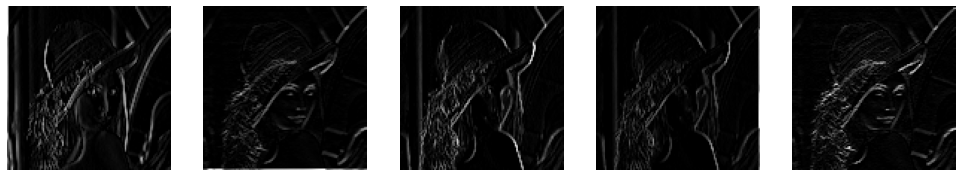

None
**********After Stacking Pooling Features Map*********
5
110
*********After Combining*********


<function matplotlib.pyplot.show>

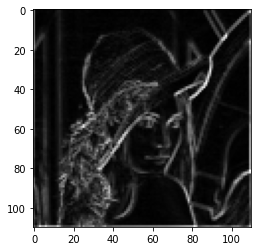

In [62]:
l1_feature_map_relu_pooling_stack = [l1_feature_map_relu_pooling[:,:,0]]
l1_feature_map_relu_pooling_stack.append(l1_feature_map_relu_pooling[:,:,1])
l1_feature_map_relu_pooling_stack.append(l1_feature_map_relu_pooling[:,:,2])
l1_feature_map_relu_pooling_stack.append(l1_feature_map_relu_pooling[:,:,3])

l1_feature_map_relu_pooling_stack.append(l1_feature_map_relu_pooling[:,:,4])

print("**********After Pooling Features Map*********")
pooling_relu_feature_map = print_image(l1_feature_map_relu_pooling_stack)

print(pooling_relu_feature_map)
print("**********After Stacking Pooling Features Map*********")
print(len(l1_feature_map_relu_pooling_stack))
total2 = 0
for ele in range(0, len(l1_feature_map_relu_pooling_stack)): 
    total2 = total2 + l1_feature_map_relu_pooling_stack[ele] 
print(len(total2))
print("*********After Combining*********")
plt.imshow(total2, cmap= 'gray')
plt.show

# ***1st Layer Done***